# Transforamtion des données 

Transformation des données suivant nos décision :

Le prétraitement des données demande beaucoup de travail et peut être une procédure très fastidieuse.Durant cette étape nous tâcherons d'appliquer les bonnes pratiques afin de structurer et nettoyer notre jeu de données. Pour ce faire nous avons réaliser l'analyse statique pour ensuite réaliser notre pipeline.



## Chargement des données

In [1]:
import os
import pandas as pd

DATA_ROOT = "./Data/"
# load data with path file on a dataframe 
def load_data(file_name:str,data_folder_path=DATA_ROOT):
    data_path = os.path.join(data_folder_path, file_name)
    if not os.path.isfile(data_path):
        print("error file not found :",data_path)
        df= pd.DataFrame()
    else :
        df = pd.read_csv(data_path)
    return df

In [2]:
data_merge = load_data("DataMerge.csv")
data_merge = data_merge.drop("Unnamed: 0",axis=1)
data_merge.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age  \
0           1                      3.0              4.0              2.0   51   
1           2                      3.0              2.0              4.0   31   
2           3                      2.0              2.0              1.0   32   
3           4                      4.0              4.0              3.0   38   
4           5                      4.0              1.0              3.0   32   

  Attrition     BusinessTravel              Department  DistanceFromHome  \
0        No      Travel_Rarely                   Sales                 6   
1       Yes  Travel_Frequently  Research & Development                10   
2        No  Travel_Frequently  Research & Development                17   
3        No         Non-Travel  Research & Development                 2   
4        No      Travel_Rarely  Research & Development                10   

   Education  ... StandardHours  StockOptionLevel TotalWorkingYears  \
0          2  ...             8                 0               1.0   
1          1  ...             8                 1               6.0   
2          4  ...             8                 3               5.0   
3          5  ...             8                 3              13.0   
4          1  ...             8                 2               9.0   

   TrainingTimesLastYear YearsAtCompany YearsSinceLastPromotion  \
0                      6              1                       0   
1                      3              5                       1   
2                      2              5                       0   
3                      5              8                       7   
4                      2              6                       0   

   YearsWithCurrManager  JobInvolvement PerformanceRating  MeanWorkingTime  
0                     0               3                 3         7.373651  
1                     4               2                 4         7.718969  
2                     3               3                 3         7.013240  
3                     5               2                 3         7.193678  
4                     4               3                 3         8.006175  

[5 rows x 30 columns]

In [3]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

## Analyse et visualisation statiques des données

Pour les statistiques nous suprimons les Nan et valeurs non numérique.

In [4]:
data_stats = data_merge.copy()
#Drop rows with Nan
data_stats.dropna(inplace=True)
colToDel = ["MaritalStatus", "JobRole", "Department","BusinessTravel","EducationField","Over18","Gender"]
data_stats = data_stats.drop(colToDel, axis=1)


La visualisation de données est un ensemble de techniques utilisées pour communiquer des informations sous forme d’objets visuels. On peut utiliser differents types de graph.

Pouvoir visualiser ses données lorsqu’on les manipule est une nécessité. Observer des graphes nous permet d’anticiper certains problèmes et de mieux peaufiner nos futures analyses.

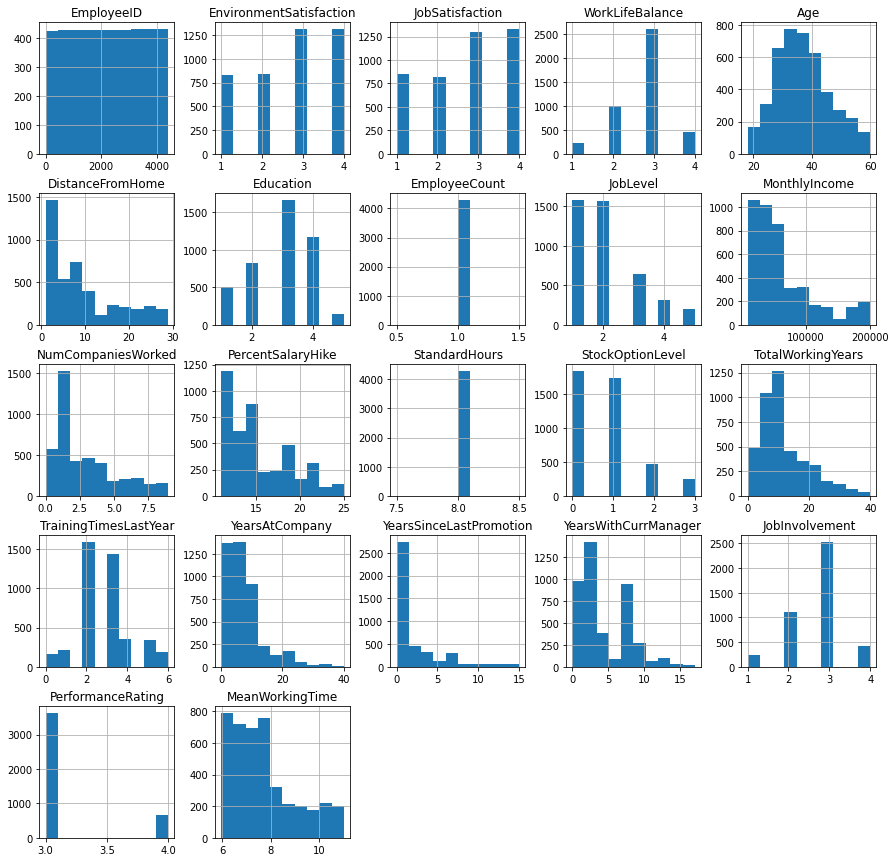

In [5]:
from matplotlib import pyplot as plt

data_stats.hist(figsize=(15,15))
plt.show()

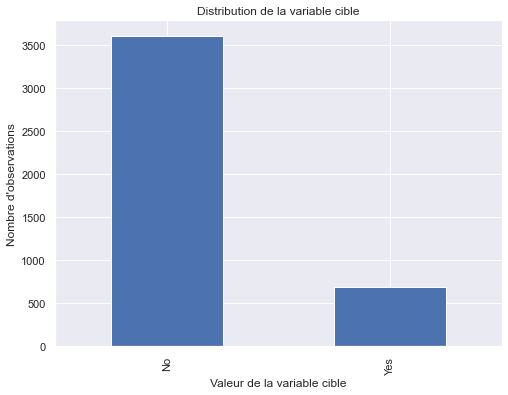

In [59]:
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
data_stats['Attrition'].value_counts().plot(kind='bar', ax=ax)
ax.set_title("Distribution de la variable cible")
ax.set_xlabel("Valeur de la variable cible")
ax.set_ylabel("Nombre d'observations")
plt.show()

Ce graphique à barres visualise la distribution de la variable cible "Attrition" dans notre ensemble de données.

In [6]:
import plotly.express as px

# Créer une fonction qui génère des graphiques en fonction de la feature
def plot_feature(data, feature):
    fig = px.histogram(data, x=feature, color="Attrition", barmode="group",
                       template="plotly_white",
                       labels={"Attrition": "Turnover", feature: feature.capitalize()},
                       color_discrete_sequence=["salmon", "lightblue"])
    fig.update_layout(title=f"Turnover Frequency by {feature.capitalize()}", 
                      xaxis_title=feature.capitalize(),
                      yaxis_title="Frequency")
    fig.show()

# Générer des graphiques pour chaque feature
for col in data_stats.select_dtypes({'int64', 'float64', 'uint8'}):
    plot_feature(data_stats, col)

In [7]:
# Créer une fonction qui génère des graphiques en fonction de la feature
def plot_feature(data, feature):
    fig = px.box(data, x="Attrition", y=feature,
                 template="plotly_white",
                 labels={"Attrition": "Turnover", feature: feature.capitalize()},
                 color_discrete_sequence=["salmon", "lightblue"])
    fig.update_layout(title=f"Turnover Distribution by {feature.capitalize()}", 
                      xaxis_title="Turnover",
                      yaxis_title=feature.capitalize())
    fig.show()

# Générer des graphiques pour chaque feature
for col in data_stats.select_dtypes({'int64', 'float64', 'uint8'}):
    plot_feature(data_stats, col)

Il est important de faire des boites à moustache pour plusieurs raisons :

Visualisation des mesures de tendance centrale : Les graphiques de boîtes à moustache présentent des mesures de tendance centrale telles que la médiane et les quartiles qui donnent une idée de la répartition des données. Cette information est importante pour comprendre la distribution des données et détecter les valeurs aberrantes ou les valeurs extrêmes.

Comparaison de plusieurs groupes : Les graphiques de boîtes permettent de comparer plusieurs groupes en même temps et de visualiser les différences entre eux. Cette comparaison peut être faite pour une seule variable ou plusieurs variables en même temps.

Détection de la symétrie et de l'asymétrie : Les graphiques de boîtes permettent de visualiser si la distribution est symétrique ou asymétrique. Une distribution asymétrique peut être un indicateur d'un biais dans les données ou d'une non-normalité.

Détection de la présence de valeurs aberrantes : Les graphiques de boîtes sont utiles pour détecter la présence de valeurs aberrantes dans les données. Les valeurs aberrantes sont des valeurs extrêmes qui peuvent fausser les résultats d'une analyse statistique et doivent être identifiées.

En somme, les graphiques de boîtes sont un outil puissant pour visualiser la distribution des données et pour identifier les tendances et les différences entre plusieurs groupes. Ils sont donc importants pour comprendre les données et pour prendre des décisions éclairées en matière d'analyse de données.

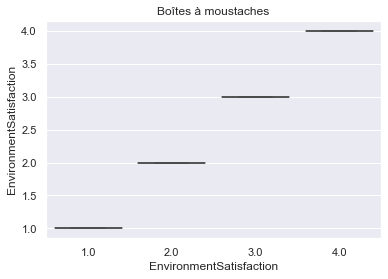

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set()

ax = sns.boxplot(x="EnvironmentSatisfaction", y="EnvironmentSatisfaction", data=data_stats, color='blue')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('EnvironmentSatisfaction')
plt.title('Boîtes à moustaches')
plt.show()


# ANOVA

L'analyse de variance (ANOVA) est une méthode statistique qui permet de comparer les moyennes d'une variable numérique entre deux groupes ou plus. L'objectif principal de l'ANOVA est de déterminer s'il existe une différence significative entre les moyennes des groupes.

Il est important de réaliser une ANOVA lorsque l'on veut comparer les moyennes de deux groupes car elle permet de :

Tester l'hypothèse nulle : L'hypothèse nulle dans une ANOVA est que toutes les moyennes des groupes sont égales. L'ANOVA permet de tester cette hypothèse en utilisant un test de significativité.

Évaluer la significativité de la différence entre les groupes : Si l'ANOVA rejette l'hypothèse nulle, cela signifie qu'il y a une différence significative entre les moyennes des groupes. L'ANOVA permet également de déterminer le degré de significativité de cette différence.

Identifier les groupes qui diffèrent significativement : Lorsqu'il y a une différence significative entre les moyennes des groupes, l'ANOVA permet d'identifier les groupes qui diffèrent significativement les uns des autres.

En résumé, l'ANOVA est une méthode importante pour comparer les moyennes de deux groupes car elle permet de tester l'hypothèse nulle, d'évaluer la significativité de la différence entre les groupes et d'identifier les groupes qui diffèrent significativement. Cette analyse est donc essentielle pour comprendre les différences entre deux groupes et pour prendre des décisions éclairées en matière d'analyse de données.

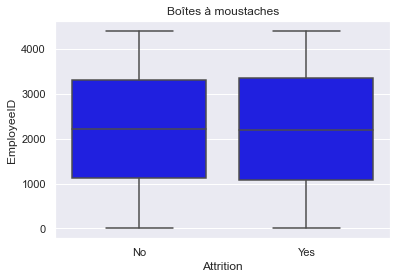

                            OLS Regression Results                            
Dep. Variable:             EmployeeID   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01253
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.911
Time:                        11:51:27   Log-Likelihood:                -36839.
No. Observations:                4300   AIC:                         7.368e+04
Df Residuals:                    4298   BIC:                         7.370e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2212.6485     21.190  

sum_sq      df         F    PR(>F)
Attrition  2.027516e+04     1.0  0.012526  0.910893
Residual   6.956980e+09  4298.0       NaN       NaN

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set()

ax = sns.boxplot(x="Attrition", y="EmployeeID", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('EmployeeID')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('EmployeeID~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)


Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

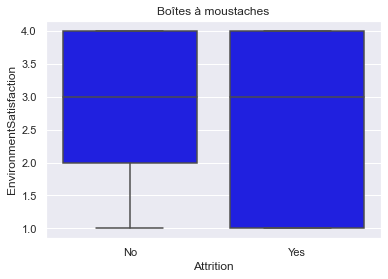

                               OLS Regression Results                              
Dep. Variable:     EnvironmentSatisfaction   R-squared:                       0.011
Model:                                 OLS   Adj. R-squared:                  0.010
Method:                      Least Squares   F-statistic:                     46.53
Date:                     Wed, 15 Mar 2023   Prob (F-statistic):           1.03e-11
Time:                             11:41:46   Log-Likelihood:                -6463.3
No. Observations:                     4300   AIC:                         1.293e+04
Df Residuals:                         4298   BIC:                         1.294e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

sum_sq      df          F        PR(>F)
Attrition    55.080862     1.0  46.526302  1.029821e-11
Residual   5088.251928  4298.0        NaN           NaN

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set()

ax = sns.boxplot(x="Attrition", y="EnvironmentSatisfaction", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('EnvironmentSatisfaction')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('EnvironmentSatisfaction~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)


Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

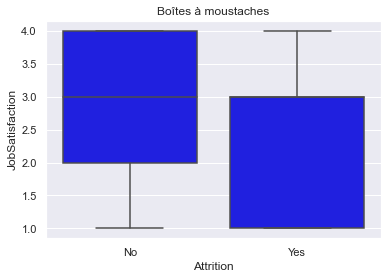

                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     46.17
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.23e-11
Time:                        11:41:51   Log-Likelihood:                -6495.1
No. Observations:                4300   AIC:                         1.299e+04
Df Residuals:                    4298   BIC:                         1.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.7748      0.018  

sum_sq      df          F        PR(>F)
Attrition    55.479134     1.0  46.174792  1.229821e-11
Residual   5164.058308  4298.0        NaN           NaN

In [10]:
sns.set()

ax = sns.boxplot(x="Attrition", y="JobSatisfaction", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('JobSatisfaction')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('JobSatisfaction~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

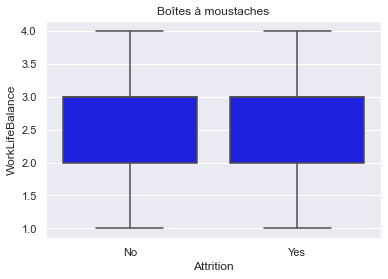

                            OLS Regression Results                            
Dep. Variable:        WorkLifeBalance   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     15.43
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           8.68e-05
Time:                        11:41:54   Log-Likelihood:                -4607.2
No. Observations:                4300   AIC:                             9218.
Df Residuals:                    4298   BIC:                             9231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.7798      0.012  

sum_sq      df          F    PR(>F)
Attrition     7.706080     1.0  15.433647  0.000087
Residual   2146.008106  4298.0        NaN       NaN

In [11]:
sns.set()

ax = sns.boxplot(x="Attrition", y="WorkLifeBalance", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('WorkLifeBalance')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('WorkLifeBalance~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

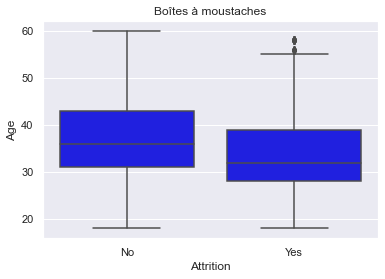

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     106.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.05e-24
Time:                        11:57:55   Log-Likelihood:                -15566.
No. Observations:                4300   AIC:                         3.114e+04
Df Residuals:                    4298   BIC:                         3.115e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           37.5517      0.150  

sum_sq      df           F        PR(>F)
Attrition    8705.848889     1.0  106.620491  1.045918e-24
Residual   350943.221808  4298.0         NaN           NaN

In [50]:
sns.set()

ax = sns.boxplot(x="Attrition", y="Age", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('Age~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

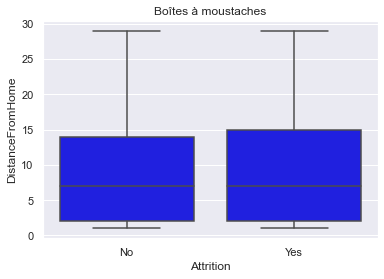

                            OLS Regression Results                            
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2971
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.586
Time:                        11:46:10   Log-Likelihood:                -15094.
No. Observations:                4300   AIC:                         3.019e+04
Df Residuals:                    4298   BIC:                         3.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.2275      0.135  

sum_sq      df         F    PR(>F)
Attrition      19.482621     1.0  0.297113  0.585726
Residual   281833.098542  4298.0       NaN       NaN

In [48]:
sns.set()

ax = sns.boxplot(x="Attrition", y="DistanceFromHome", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('DistanceFromHome~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)


Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

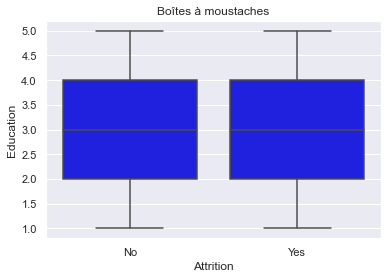

                            OLS Regression Results                            
Dep. Variable:              Education   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9981
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.318
Time:                        11:42:28   Log-Likelihood:                -6205.7
No. Observations:                4300   AIC:                         1.242e+04
Df Residuals:                    4298   BIC:                         1.243e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.9201      0.017  

sum_sq      df         F    PR(>F)
Attrition     1.048146     1.0  0.998081  0.317832
Residual   4513.596272  4298.0       NaN       NaN

In [16]:
sns.set()

ax = sns.boxplot(x="Attrition", y="Education", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('Education')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('Education~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

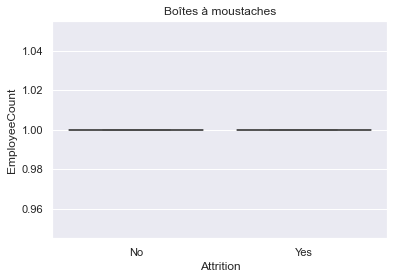

                            OLS Regression Results                            
Dep. Variable:          EmployeeCount   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -4298.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               1.00
Time:                        11:58:55   Log-Likelihood:             1.3083e+05
No. Observations:                4300   AIC:                        -2.616e+05
Df Residuals:                    4298   BIC:                        -2.616e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0000   2.47e-16  

C:\Users\Yann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning:

divide by zero encountered in double_scalars



sum_sq      df         F    PR(>F)
Attrition  1.449298e-28     1.0  0.660805  0.416321
Residual   9.426503e-25  4298.0       NaN       NaN

In [51]:
sns.set()

ax = sns.boxplot(x="Attrition", y="EmployeeCount", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('EmployeeCount')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('EmployeeCount~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

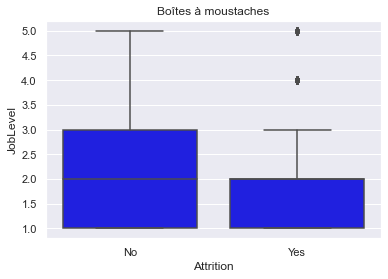

                            OLS Regression Results                            
Dep. Variable:               JobLevel   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9148
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.339
Time:                        11:42:31   Log-Likelihood:                -6536.2
No. Observations:                4300   AIC:                         1.308e+04
Df Residuals:                    4298   BIC:                         1.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.0741      0.018  

sum_sq      df         F   PR(>F)
Attrition     1.120265     1.0  0.914755  0.33891
Residual   5263.590433  4298.0       NaN      NaN

In [17]:
sns.set()

ax = sns.boxplot(x="Attrition", y="JobLevel", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('JobLevel')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('JobLevel~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

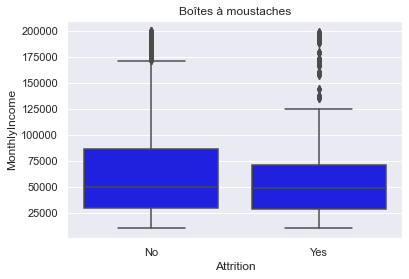

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.581
Date:                Wed, 15 Mar 2023   Prob (F-statistic):             0.0324
Time:                        11:42:34   Log-Likelihood:                -52362.
No. Observations:                4300   AIC:                         1.047e+05
Df Residuals:                    4298   BIC:                         1.047e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.573e+04    783.220  

sum_sq      df         F    PR(>F)
Attrition  1.012974e+10     1.0  4.580636  0.032391
Residual   9.504716e+12  4298.0       NaN       NaN

In [18]:
sns.set()

ax = sns.boxplot(x="Attrition", y="MonthlyIncome", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('MonthlyIncome~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

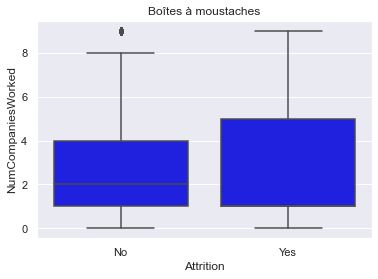

                            OLS Regression Results                            
Dep. Variable:     NumCompaniesWorked   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.303
Date:                Wed, 15 Mar 2023   Prob (F-statistic):            0.00398
Time:                        11:42:38   Log-Likelihood:                -10030.
No. Observations:                4300   AIC:                         2.006e+04
Df Residuals:                    4298   BIC:                         2.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.6419      0.042  

sum_sq      df         F    PR(>F)
Attrition     51.632956     1.0  8.303424  0.003977
Residual   26726.137044  4298.0       NaN       NaN

In [19]:
sns.set()

ax = sns.boxplot(x="Attrition", y="NumCompaniesWorked", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('NumCompaniesWorked')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('NumCompaniesWorked~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

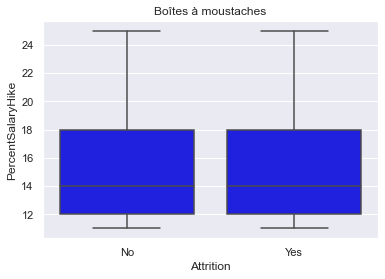

                            OLS Regression Results                            
Dep. Variable:      PercentSalaryHike   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.100
Date:                Wed, 15 Mar 2023   Prob (F-statistic):             0.0240
Time:                        11:42:41   Log-Likelihood:                -11681.
No. Observations:                4300   AIC:                         2.337e+04
Df Residuals:                    4298   BIC:                         2.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.1553      0.061  

sum_sq      df         F    PR(>F)
Attrition     68.351436     1.0  5.099653  0.023981
Residual   57606.756471  4298.0       NaN       NaN

In [20]:
sns.set()

ax = sns.boxplot(x="Attrition", y="PercentSalaryHike", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('PercentSalaryHike')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('PercentSalaryHike~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

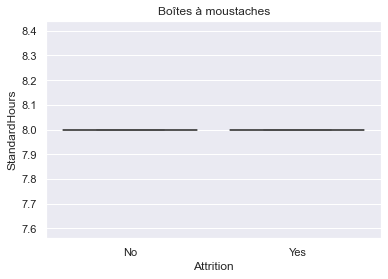

                            OLS Regression Results                            
Dep. Variable:          StandardHours   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -4298.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               1.00
Time:                        11:59:52   Log-Likelihood:             1.2189e+05
No. Observations:                4300   AIC:                        -2.438e+05
Df Residuals:                    4298   BIC:                        -2.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.0000   1.97e-15  

C:\Users\Yann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning:

divide by zero encountered in double_scalars



sum_sq      df         F    PR(>F)
Attrition  9.275510e-27     1.0  0.660805  0.416321
Residual   6.032962e-23  4298.0       NaN       NaN

In [52]:
sns.set()

ax = sns.boxplot(x="Attrition", y="StandardHours", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('StandardHours')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('StandardHours~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

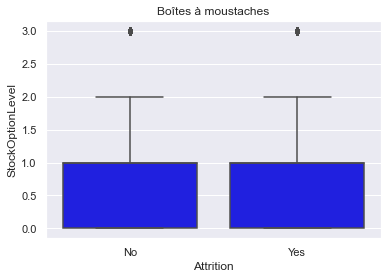

                            OLS Regression Results                            
Dep. Variable:       StockOptionLevel   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2731
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.601
Time:                        11:42:45   Log-Likelihood:                -5419.8
No. Observations:                4300   AIC:                         1.084e+04
Df Residuals:                    4298   BIC:                         1.086e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7983      0.014  

sum_sq      df         F    PR(>F)
Attrition     0.198977     1.0  0.273079  0.601301
Residual   3131.707999  4298.0       NaN       NaN

In [21]:
sns.set()

ax = sns.boxplot(x="Attrition", y="StockOptionLevel", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('StockOptionLevel')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('StockOptionLevel~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

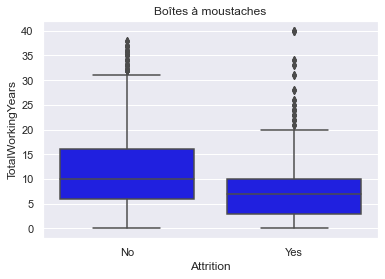

                            OLS Regression Results                            
Dep. Variable:      TotalWorkingYears   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     125.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           8.49e-29
Time:                        11:42:48   Log-Likelihood:                -14866.
No. Observations:                4300   AIC:                         2.974e+04
Df Residuals:                    4298   BIC:                         2.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.8619      0.128  

sum_sq      df           F        PR(>F)
Attrition    7419.121031     1.0  125.805698  8.487206e-29
Residual   253465.326411  4298.0         NaN           NaN

In [22]:
sns.set()

ax = sns.boxplot(x="Attrition", y="TotalWorkingYears", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('TotalWorkingYears')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('TotalWorkingYears~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

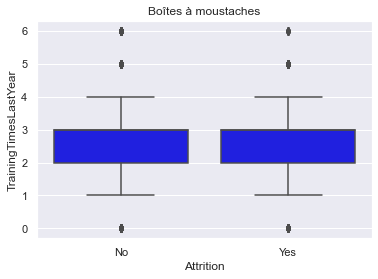

                              OLS Regression Results                             
Dep. Variable:     TrainingTimesLastYear   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                  0.002
Method:                    Least Squares   F-statistic:                     9.209
Date:                   Wed, 15 Mar 2023   Prob (F-statistic):            0.00242
Time:                           11:42:52   Log-Likelihood:                -7191.8
No. Observations:                   4300   AIC:                         1.439e+04
Df Residuals:                       4298   BIC:                         1.440e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

sum_sq      df         F    PR(>F)
Attrition    15.298567     1.0  9.208825  0.002423
Residual   7140.241898  4298.0       NaN       NaN

In [23]:
sns.set()

ax = sns.boxplot(x="Attrition", y="TrainingTimesLastYear", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('TrainingTimesLastYear')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('TrainingTimesLastYear~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

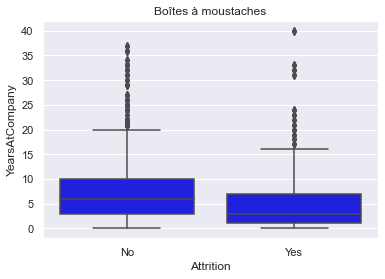

                            OLS Regression Results                            
Dep. Variable:         YearsAtCompany   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     78.12
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.39e-18
Time:                        11:42:55   Log-Likelihood:                -13872.
No. Observations:                4300   AIC:                         2.775e+04
Df Residuals:                    4298   BIC:                         2.776e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.3867      0.101  

sum_sq      df          F        PR(>F)
Attrition    2900.904637     1.0  78.123703  1.386866e-18
Residual   159594.178154  4298.0        NaN           NaN

In [24]:
sns.set()

ax = sns.boxplot(x="Attrition", y="YearsAtCompany", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('YearsAtCompany')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('YearsAtCompany~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

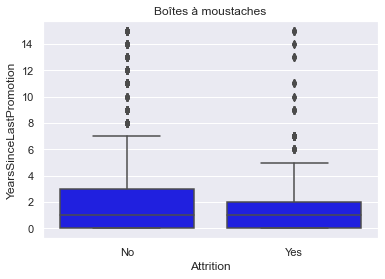

                               OLS Regression Results                              
Dep. Variable:     YearsSinceLastPromotion   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.001
Method:                      Least Squares   F-statistic:                     3.854
Date:                     Wed, 15 Mar 2023   Prob (F-statistic):             0.0497
Time:                             11:42:59   Log-Likelihood:                -11142.
No. Observations:                     4300   AIC:                         2.229e+04
Df Residuals:                         4298   BIC:                         2.230e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

sum_sq      df         F    PR(>F)
Attrition     40.201758     1.0  3.853968  0.049693
Residual   44833.568242  4298.0       NaN       NaN

In [25]:
sns.set()

ax = sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('YearsSinceLastPromotion')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('YearsSinceLastPromotion~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

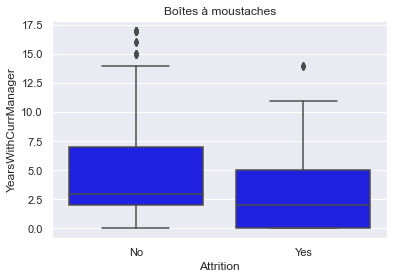

                             OLS Regression Results                             
Dep. Variable:     YearsWithCurrManager   R-squared:                       0.024
Model:                              OLS   Adj. R-squared:                  0.024
Method:                   Least Squares   F-statistic:                     106.4
Date:                  Wed, 15 Mar 2023   Prob (F-statistic):           1.17e-24
Time:                          11:43:02   Log-Likelihood:                -11515.
No. Observations:                  4300   AIC:                         2.303e+04
Df Residuals:                      4298   BIC:                         2.305e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

sum_sq      df           F        PR(>F)
Attrition   1320.396121     1.0  106.390043  1.171598e-24
Residual   53342.045740  4298.0         NaN           NaN

In [26]:
sns.set()

ax = sns.boxplot(x="Attrition", y="YearsWithCurrManager", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('YearsWithCurrManager')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('YearsWithCurrManager~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

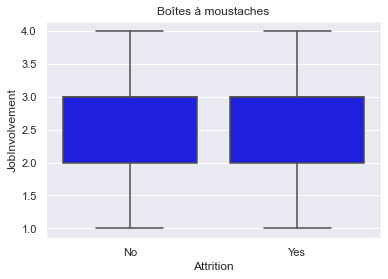

                            OLS Regression Results                            
Dep. Variable:         JobInvolvement   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9296
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.335
Time:                        11:43:06   Log-Likelihood:                -4632.4
No. Observations:                4300   AIC:                             9269.
Df Residuals:                    4298   BIC:                             9282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.7334      0.012  

sum_sq      df         F    PR(>F)
Attrition     0.469621     1.0  0.929571  0.335029
Residual   2171.354566  4298.0       NaN       NaN

In [27]:
sns.set()

ax = sns.boxplot(x="Attrition", y="JobInvolvement", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('JobInvolvement')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('JobInvolvement~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

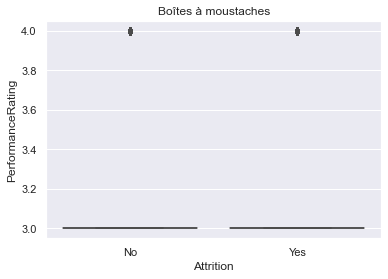

                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.966
Date:                Wed, 15 Mar 2023   Prob (F-statistic):             0.0851
Time:                        11:43:09   Log-Likelihood:                -1717.6
No. Observations:                4300   AIC:                             3439.
Df Residuals:                    4298   BIC:                             3452.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.1498      0.006  

sum_sq      df         F   PR(>F)
Attrition    0.386274     1.0  2.966261  0.08509
Residual   559.696517  4298.0       NaN      NaN

In [28]:
sns.set()

ax = sns.boxplot(x="Attrition", y="PerformanceRating", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('PerformanceRating')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('PerformanceRating~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

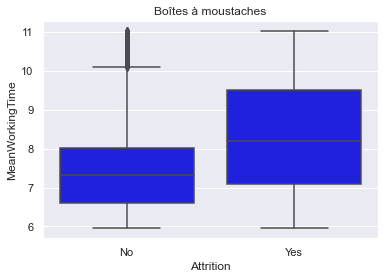

                            OLS Regression Results                            
Dep. Variable:        MeanWorkingTime   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     175.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           2.58e-39
Time:                        11:43:13   Log-Likelihood:                -7282.0
No. Observations:                4300   AIC:                         1.457e+04
Df Residuals:                    4298   BIC:                         1.458e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.5861      0.022  

sum_sq      df           F        PR(>F)
Attrition   304.241202     1.0  175.606106  2.581855e-39
Residual   7446.373696  4298.0         NaN           NaN

In [29]:
sns.set()

ax = sns.boxplot(x="Attrition", y="MeanWorkingTime", data=data_stats, color='blue')
plt.xlabel('Attrition')
plt.ylabel('MeanWorkingTime')
plt.title('Boîtes à moustaches')
plt.show()
anova_variete = smf.ols('MeanWorkingTime~Attrition', data=data_stats).fit()
print(anova_variete.summary())
sm.stats.anova_lm(anova_variete, typ=2)

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

# Khi-deux pour les données qualitative.

Le test du Chi-carré (ou Khi-deux) est une méthode statistique utilisée pour déterminer si la distribution d'une variable qualitative dans un échantillon diffère significativement de la distribution attendue. C'est une méthode importante pour l'analyse de données qualitatives car elle permet de tester si les différences observées sont significatives ou simplement dues au hasard.

Voici quelques raisons pour lesquelles il est important d'utiliser le test du Chi-carré pour les données qualitatives :

Tester l'hypothèse nulle : Le test du Chi-carré permet de tester l'hypothèse nulle selon laquelle il n'y a pas de différence significative entre la distribution de la variable qualitative dans l'échantillon et la distribution attendue. Si l'hypothèse nulle est rejetée, cela suggère qu'il existe une relation entre la variable qualitative et la distribution de l'échantillon.

Évaluer la force de la relation : Le test du Chi-carré permet également d'évaluer la force de la relation entre la variable qualitative et la distribution de l'échantillon. En calculant la statistique du Chi-carré, on peut déterminer si la relation est forte ou faible.

Identifier les différences significatives : En utilisant le test du Chi-carré, on peut identifier les différences significatives entre les groupes dans la distribution de la variable qualitative. Cela peut aider à comprendre les différences entre les groupes et à prendre des décisions éclairées.

En résumé, le test du Chi-carré est important pour l'analyse de données qualitatives car il permet de tester l'hypothèse nulle, d'évaluer la force de la relation entre la variable qualitative et la distribution de l'échantillon, et d'identifier les différences significatives entre les groupes. Cette analyse est essentielle pour comprendre les différences entre les groupes et pour prendre des décisions éclairées en matière d'analyse de données qualitatives.

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  882     1767    1050
Yes                  99      252     360

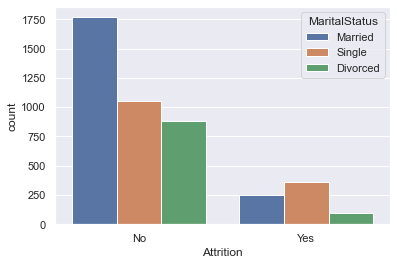

In [30]:
import scipy.stats as stats
sns.countplot(x='Attrition', hue='MaritalStatus', data=data_merge)
cont_table =pd.crosstab(data_merge['Attrition'], data_merge['MaritalStatus'])
cont_table

In [71]:
stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=138.49102962254608, pvalue=8.45385940605786e-31, dof=2, expected_freq=array([[ 822.83877551, 1693.4877551 , 1182.67346939],
       [ 158.16122449,  325.5122449 ,  227.32653061]]))

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
No                               336              135                    651   
Yes                               57               21                    126   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
No             264                     387                183   
Yes             42                      48                 57   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
No                        717              813                   213  
Yes                       159              165                    36

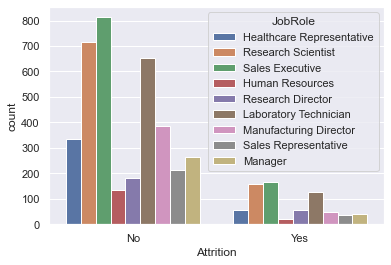

In [31]:
import scipy.stats as stats
sns.countplot(x='Attrition', hue='JobRole', data=data_merge)
cont_table =pd.crosstab(data_merge['Attrition'], data_merge['JobRole'])
cont_table

In [32]:
stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=25.116313674604072, pvalue=0.001485544744815264, dof=8, expected_freq=array([[329.63877551, 130.84897959, 651.72857143, 256.66530612,
        364.86734694, 201.30612245, 734.76734694, 820.32244898,
        208.85510204],
       [ 63.36122449,  25.15102041, 125.27142857,  49.33469388,
         70.13265306,  38.69387755, 141.23265306, 157.67755102,
         40.14489796]]))

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                      132                    2430   1137
Yes                      57                     453    201

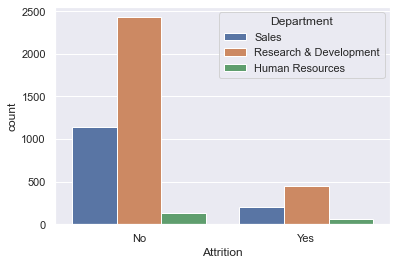

In [33]:
import scipy.stats as stats
sns.countplot(x='Attrition', hue='Department', data=data_merge)
cont_table =pd.crosstab(data_merge['Attrition'], data_merge['Department'])
cont_table

In [34]:
stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=29.090274924488266, pvalue=4.820888218170407e-07, dof=2, expected_freq=array([[ 158.52857143, 2418.18979592, 1122.28163265],
       [  30.47142857,  464.81020408,  215.71836735]]))

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     414                624           2661
Yes                     36                207            468

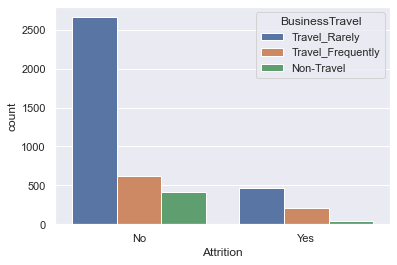

In [36]:
import scipy.stats as stats
sns.countplot(x='Attrition', hue='BusinessTravel', data=data_merge)
cont_table =pd.crosstab(data_merge['Attrition'], data_merge['BusinessTravel'])
cont_table

In [37]:
stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=72.54724105696552, pvalue=1.7642769729831887e-16, dof=2, expected_freq=array([[ 377.44897959,  697.02244898, 2624.52857143],
       [  72.55102041,  133.97755102,  504.47142857]]))

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
No                           48           1515        402     1167    216   
Yes                          33            303         75      225     30   

EducationField  Technical Degree  
Attrition                         
No                           351  
Yes                           45

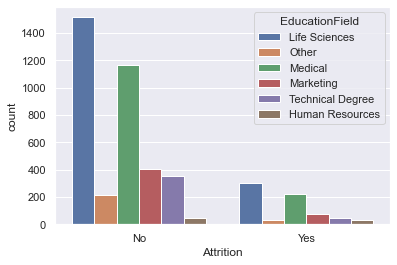

In [38]:
import scipy.stats as stats
sns.countplot(x='Attrition', hue='EducationField', data=data_merge)
cont_table =pd.crosstab(data_merge['Attrition'], data_merge['EducationField'])
cont_table


In [39]:
stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=46.194921001730584, pvalue=8.288917469574179e-09, dof=5, expected_freq=array([[  67.94081633, 1524.89387755,  400.09591837, 1167.5755102 ,
         206.33877551,  332.15510204],
       [  13.05918367,  293.10612245,   76.90408163,  224.4244898 ,
          39.66122449,   63.84489796]]))

Nous allons garder cette Variable car la valeur de P est inférieur à 0.05 elle influe donc sur l'attrition.

Over18        Y
Attrition      
No         3699
Yes         711

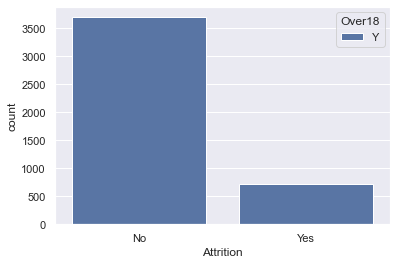

In [53]:
import scipy.stats as stats
sns.countplot(x='Attrition', hue='Over18', data=data_merge)
cont_table =pd.crosstab(data_merge['Attrition'], data_merge['Over18'])
cont_table


In [54]:
stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[3699.],
       [ 711.]]))

Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

Gender     Female  Male
Attrition              
No           1494  2205
Yes           270   441

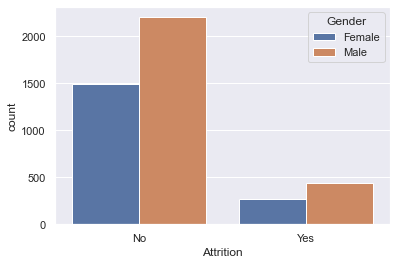

In [55]:
import scipy.stats as stats
sns.countplot(x='Attrition', hue='Gender', data=data_merge)
cont_table =pd.crosstab(data_merge['Attrition'], data_merge['Gender'])
cont_table


In [56]:
stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=1.349904410246582, pvalue=0.24529482862926827, dof=1, expected_freq=array([[1479.6, 2219.4],
       [ 284.4,  426.6]]))

Nous n'allons pas garder cette Variable car la valeur de P est supérieure à 0.05 elle n'influe donc pas sur l'attriction.

In [40]:
data_stats["MonthlyIncome"].describe()

count      4300.000000
mean      65059.844186
std       47045.398914
min       10090.000000
25%       29260.000000
50%       49360.000000
75%       83802.500000
max      199990.000000
Name: MonthlyIncome, dtype: float64

Etude du champ "MonthlyIncome"


La moyenne des salaire est de 65059.844186 rubbis/an. 
L'écart type nous montre qu'il y a un grand écart entre les petits et grands salaires.
Nous constatons des extremes importants.

In [41]:
data_stats["WorkLifeBalance"].describe()

count    4300.000000
mean        2.761163
std         0.707800
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

Etude du champ "WorkLifeBalance"


Dans l'ensemble les employées ont un bon équilibre entre leurs vie et leurs travail.

In [42]:
data_stats["JobSatisfaction"].describe()

count    4300.000000
mean        2.724884
std         1.101875
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

Etude du champ "JobSatisfaction"


Les employées sont majoritairement satisfait de leurs emplois.

In [43]:
data_stats["EnvironmentSatisfaction"].describe()

count    4300.000000
mean        2.723953
std         1.093802
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

Etude du champ "EnvironmentSatisfaction"


Leurs environnement de travail est egalement majortairement satisfaisant pour les salariés.

In [44]:
data_stats["YearsAtCompany"].describe()

count    4300.000000
mean        7.026047
std         6.148036
min         0.000000
25%         3.000000
50%         5.000000
75%         9.250000
max        40.000000
Name: YearsAtCompany, dtype: float64

Etude du champ "YearsAtCompany"


Le nombre d'années passé dans l'entreprise reste faible (7 ans en moyenne).
l'étendu des valeurs est très grande (de 0 à 40ans).

In [1]:
import seaborn as sns
# Calculer et afficher la matrice de corrélation des features
corr_matrix = data_stats.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="coolwarm",  # Utiliser une colormap plus appropriée
            center=0,  # Définir le centre de la colormap
            square=True,  # Forcer la forme carrée
            cbar_kws={"shrink": .5},  # Réduire la taille de la colorbar
            ax=ax)
ax.set_title("Matrice de corrélation")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

NameError: name 'data_stats' is not defined

In [46]:
data_stats["PercentSalaryHike_for_PerformanceRating"] =  data_stats.apply(lambda x: x["PercentSalaryHike"]/x["PerformanceRating"],axis=1)
data_stats["PerformanceRating_for_MeanWorkingTime"] =  data_stats.apply(lambda x: x["PerformanceRating"]/x["MeanWorkingTime"],axis=1)

data_stats

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
0              1                      3.0              4.0              2.0   
1              2                      3.0              2.0              4.0   
2              3                      2.0              2.0              1.0   
3              4                      4.0              4.0              3.0   
4              5                      4.0              1.0              3.0   
...          ...                      ...              ...              ...   
4404        4405                      3.0              4.0              3.0   
4405        4406                      4.0              1.0              3.0   
4406        4407                      4.0              4.0              3.0   
4407        4408                      1.0              3.0              3.0   
4408        4409                      4.0              1.0              3.0   

      Age Attrition  DistanceFromHome  Education  EmployeeCount  Gender  ...  \
0      51        No                 6          2              1  Female  ...   
1      31       Yes                10          1              1  Female  ...   
2      32        No                17          4              1    Male  ...   
3      38        No                 2          5              1    Male  ...   
4      32        No                10          1              1    Male  ...   
...   ...       ...               ...        ...            ...     ...  ...   
4404   29        No                 4          3              1  Female  ...   
4405   42        No                 5          4              1  Female  ...   
4406   29        No                 2          4              1    Male  ...   
4407   25        No                25          2              1    Male  ...   
4408   42        No                18          2              1    Male  ...   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                   1.0                      6               1   
1                   6.0                      3               5   
2                   5.0                      2               5   
3                  13.0                      5               8   
4                   9.0                      2               6   
...                 ...                    ...             ...   
4404                6.0                      2               6   
4405               10.0                      5               3   
4406               10.0                      2               3   
4407                5.0                      4               4   
4408               10.0                      2               9   

     YearsSinceLastPromotion  YearsWithCurrManager  JobInvolvement  \
0                          0                     0               3   
1                          1                     4               2   
2                          0                     3               3   
3                          7                     5               2   
4                          0                     4               3   
...                      ...                   ...             ...   
4404                       1                     5               2   
4405                       0                     2               3   
4406                       0                     2               2   
4407                       1                     2               3   
4408                       7                     8               2   

      PerformanceRating  MeanWorkingTime  \
0                     3         7.373651   
1                     4         7.718969   
2                     3         7.013240   
3                     3         7.193678   
4                     3         8.006175   
...                 ...              ...   
4404                  3         7.292814   
4405                  3         8.522277   
4406                  3         6.092954   
4407                  

(24.5, -0.5)

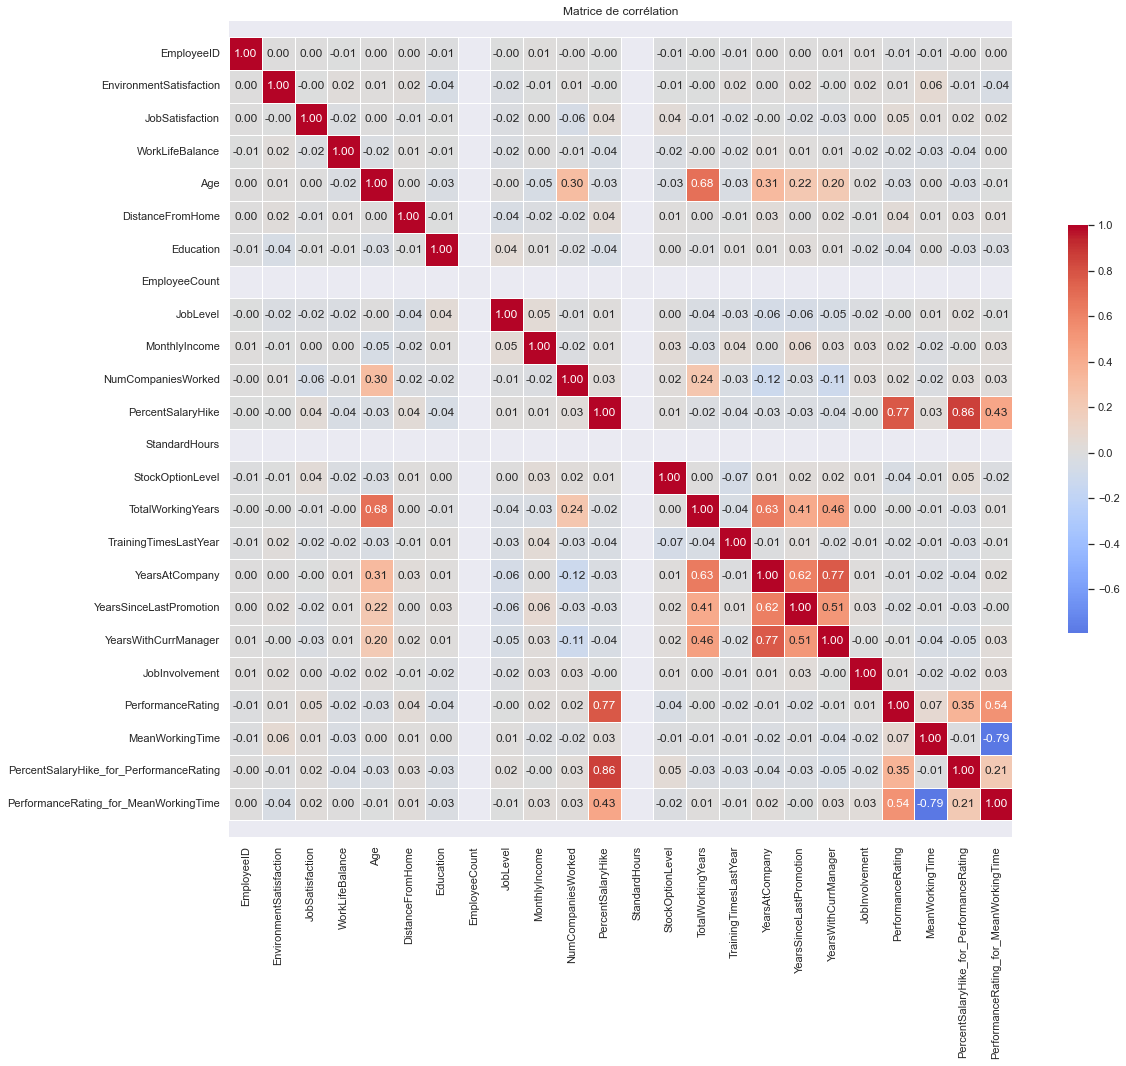

In [47]:
import seaborn as sns
# Calculer et afficher la matrice de corrélation des features
corr_matrix = data_stats.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="coolwarm",  # Utiliser une colormap plus appropriée
            center=0,  # Définir le centre de la colormap
            square=True,  # Forcer la forme carrée
            cbar_kws={"shrink": .5},  # Réduire la taille de la colorbar
            ax=ax)
ax.set_title("Matrice de corrélation")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Split des données

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data_merge, test_size=0.2)

In [82]:
X_train.shape

(3528, 24)

In [83]:
X_test.shape

(882, 24)

## Transformation des données avec un pipeline
Etapes :

A l'aide de la pipline nous supprimons les attributs de types string à l'aide d'un encodeur incrementale sur les champs :
- MaritalStatus
- JobRole
- BusinessTravel
- Department
- EducationField
- Male /female

Visualisation de la matrice des données.

In [84]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


X_Train = X_train.drop("Attrition", axis=1)
X_train_labels = X_train["Attrition"].copy()

 
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
    
 
data_num = X_Train.select_dtypes(include=[np.number])
 
num_attribs = list(data_num)
cat_attribs = ["MaritalStatus", "JobRole", "Department"]
cat_attribs_ordinal = ["BusinessTravel","EducationField"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ('cat_ordinal', OrdinalEncoder(), cat_attribs_ordinal)
    ])
 
X_prepared = full_pipeline.fit_transform(X_Train)


X_prepared

array([[ 0.24347211,  1.15307046,  0.33248608, ...,  0.        ,
         1.        ,  3.        ],
       [ 1.15629848,  0.23911122,  0.33248608, ...,  0.        ,
         0.        ,  1.        ],
       [-0.66935426, -1.58880727,  0.33248608, ...,  0.        ,
         2.        ,  5.        ],
       ...,
       [-0.66935426, -0.67484802,  0.33248608, ...,  0.        ,
         2.        ,  3.        ],
       [ 1.15629848,  1.15307046, -2.521555  , ...,  0.        ,
         2.        ,  1.        ],
       [ 1.15629848,  0.23911122,  0.33248608, ...,  0.        ,
         2.        ,  3.        ]])

In [85]:
X_prepared.shape

(3528, 35)

In [86]:
X_Train.describe()

EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
count              3508.000000      3511.000000      3498.000000   
mean                  2.731756         2.737112         2.765009   
std                   1.098588         1.096791         0.703526   
min                   1.000000         1.000000         1.000000   
25%                   2.000000         2.000000         2.000000   
50%                   3.000000         3.000000         3.000000   
75%                   4.000000         4.000000         3.000000   
max                   4.000000         4.000000         4.000000   

       DistanceFromHome    Education     JobLevel  MonthlyIncome  \
count       3528.000000  3528.000000  3528.000000    3528.000000   
mean           9.097222     2.916100     2.071429   64787.012472   
std            8.087620     1.028536     1.108260   47075.540525   
min            1.000000     1.000000     1.000000   10090.000000   
25%            2.000000     2.000000     1.000000   28740.000000   
50%            7.000000     3.000000     2.000000   48980.000000   
75%           14.000000     4.000000     3.000000   83810.000000   
max           29.000000     5.000000     5.000000  199990.000000   

       NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
count         3513.000000        3528.000000       3528.000000   
mean             2.683461          15.221088          0.793651   
std              2.478496           3.667169          0.853582   
min              0.000000          11.000000          0.000000   
25%              1.000000          12.000000          0.000000   
50%              2.000000          14.000000          1.000000   
75%              4.000000          18.000000          1.000000   
max              9.000000          25.000000          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count        3519.000000            3528.000000     3528.000000   
mean           11.258880               2.796769        6.968821   
std             7.729273               1.294827        6.055985   
min             0.000000               0.000000        0.000000   
25%             6.000000               2.000000        3.000000   
50%            10.000000               3.000000        5.000000   
75%            15.000000               3.000000        9.000000   
max            40.000000               6.000000       40.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  JobInvolvement  \
count              3528.000000           3528.000000     3528.000000   
mean                  2.155045              4.134354        2.735544   
std                   3.173563              3.559941        0.702433   
min                   0.000000              0.000000        1.000000   
25%                   0.000000              2.000000        2.000000   
50%                   1.000000              3.000000        3.000000   
75%                   3.000000              7.000000        3.000000   
max                  15.000000             17.000000        4.000000   

       PerformanceRating  MeanWorkingTime  
count        3528.000000      3528.000000  
mean            3.153628         7.706553  
std             0.360643         1.345471  
min             3.000000         5.950862  
25%             3.000000         6.665904  
50%             3.000000         7.416213  
75%             3.000000         8.381868  
max             4.000000        11.030960